<a href="https://colab.research.google.com/github/Mohima17/MSThesis/blob/main/Eddy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install pyEddyTracker

!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1"

!pip install basemap

!pip install cartopy

!pip install shapely --no-binary shapely cartopy

!pip install --no-binary shapely shapely --force

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
from datetime import datetime
import matplotlib as mpl
import random
import os
from datetime import datetime
from matplotlib import pyplot as plt
from numpy import arange
from py_eddy_tracker import data
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours


import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker

In [4]:
df1 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_dec.nc')
df2 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_jan.nc')
df3 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_feb.nc')

In [5]:
df = xr.merge([df1, df2, df3])

df

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 100, nv: 2, time: 91)
Coordinates:
  * time       (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 23.38 23.62 23.88
  * longitude  (longitude) float32 75.12 75.38 75.62 75.88 ... 99.38 99.62 99.88
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 dask.array<chunksize=(91,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(91, 80, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(91, 100, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-12-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-11-30T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

In [6]:
df.to_netcdf('drive/MyDrive/2020/SLA/sla_djf.nc')

In [ ]:
djf = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_djf.nc')

djf

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_djf.nc


/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloadin

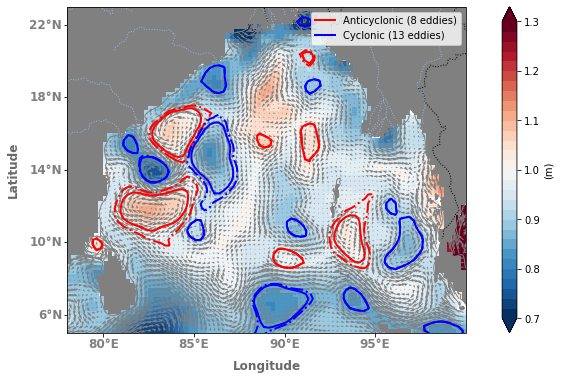

In [8]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_djf.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

In [9]:
df4 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_mar.nc')
df5 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_apr.nc')
df6 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_may.nc')

In [ ]:
df = xr.merge([df4, df5, df6])

df

In [11]:
df.to_netcdf('drive/MyDrive/2020/SLA/sla_mam.nc')

In [19]:
mam = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_mam.nc')

mam

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 100, nv: 2, time: 92)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-05-31
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 23.38 23.62 23.88
  * longitude  (longitude) float32 75.12 75.38 75.62 75.88 ... 99.38 99.62 99.88
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 dask.array<chunksize=(92,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(92, 80, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(92, 100, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-03-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-02-29T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_mam.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


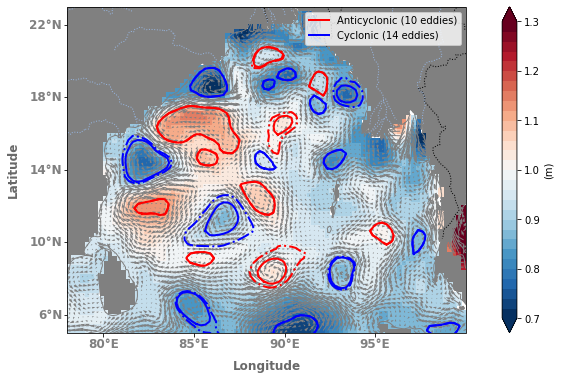

In [13]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_mam.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

In [14]:
df7 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_june.nc')
df8 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_july.nc')
df9 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_aug.nc')

In [ ]:
df = xr.merge([df7, df8, df9])

df

In [16]:
df.to_netcdf('drive/MyDrive/2020/SLA/sla_jja.nc')

In [18]:
jja = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_jja.nc')

jja

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 100, nv: 2, time: 92)
Coordinates:
  * time       (time) datetime64[ns] 2020-06-01 2020-06-02 ... 2020-08-31
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 23.38 23.62 23.88
  * longitude  (longitude) float32 75.12 75.38 75.62 75.88 ... 99.38 99.62 99.88
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 dask.array<chunksize=(92,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(92, 80, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(92, 100, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float64 dask.array<chunksize=(92, 80, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-06-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-05-31T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_jja.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


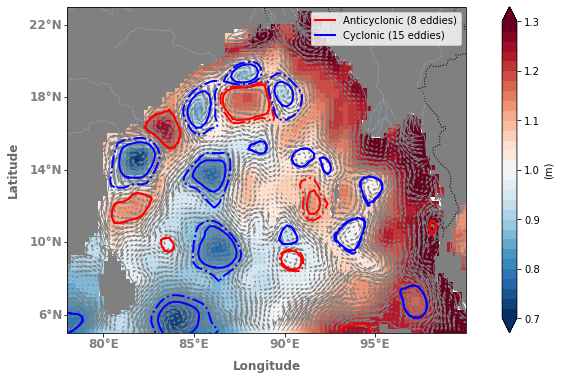

In [20]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_jja.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

In [21]:
df10 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_sept.nc')
df11 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_oct.nc')
df12 = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_nov.nc')

In [22]:
df = xr.merge([df10, df11, df12])

df

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 100, nv: 2, time: 91)
Coordinates:
  * time       (time) datetime64[ns] 2020-09-01 2020-09-02 ... 2020-11-30
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 23.38 23.62 23.88
  * longitude  (longitude) float32 75.12 75.38 75.62 75.88 ... 99.38 99.62 99.88
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 dask.array<chunksize=(91,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(91, 80, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(91, 100, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-09-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-08-31T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

In [23]:
df.to_netcdf('drive/MyDrive/2020/SLA/sla_son.nc')

In [24]:
son = xr.open_mfdataset('drive/MyDrive/2020/SLA/sla_son.nc')

son

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 100, nv: 2, time: 91)
Coordinates:
  * time       (time) datetime64[ns] 2020-09-01 2020-09-02 ... 2020-11-30
  * latitude   (latitude) float32 4.125 4.375 4.625 4.875 ... 23.38 23.62 23.88
  * longitude  (longitude) float32 75.12 75.38 75.62 75.88 ... 99.38 99.62 99.88
  * nv         (nv) int32 0 1
Data variables:
    crs        (time) float64 dask.array<chunksize=(91,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(91, 80, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(91, 100, 2), meta=np.ndarray>
    err        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    adt        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgos       (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    ugosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    vgosa      (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_ugosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
    err_vgosa  (time, latitude, longitude) float64 dask.array<chunksize=(91, 80, 100), meta=np.ndarray>
Attributes: (12/44)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    creator_email:                   servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    summary:                         SSALTO/DUACS Near-Real-Time Level-4 sea ...
    time_coverage_duration:          P1D
    time_coverage_end:               2020-09-01T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2020-08-31T12:00:00Z
    title:                           NRT merged all satellites Global Ocean G...

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_son.nc


/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


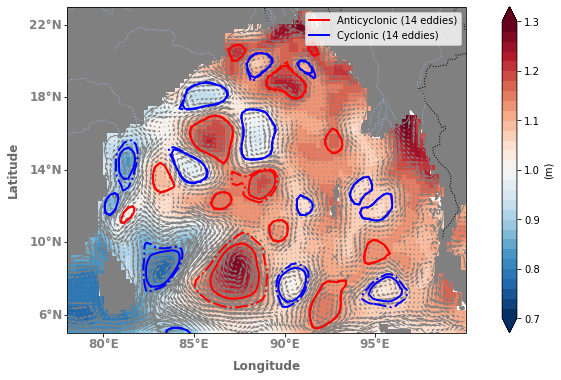

In [25]:
plt.figure(figsize=(13, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 23], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 12, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_son.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.3, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="r", linewidth= 2, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="b", linewidth= 2, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right')


plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_djf.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_mam.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_jja.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_son.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


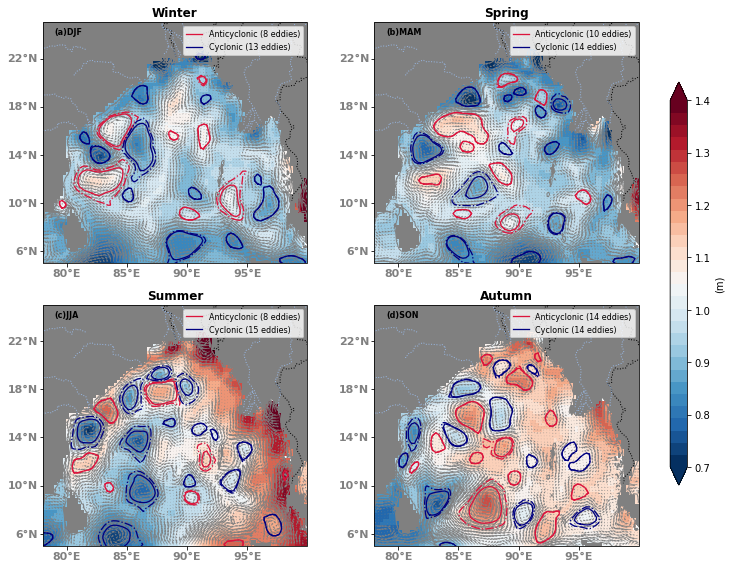

In [71]:
fig = plt.figure(figsize=(15, 8))


############################### First Plot -- DJF ##################################

ax = fig.add_subplot(221, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 25], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
#ax.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_djf.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

ax.legend(loc='upper right', fontsize = 8)

ax.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################### Second plot -- MAM #####################################

ax1 = fig.add_subplot(222, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 25], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
ax1.set_yticks([6, 10, 14, 18, 22])

ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = True
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_mam.nc', "longitude", "latitude",)

m2 = g2.display(ax1, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 4, 15)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax1, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax1, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax1.quiver(g2.x_c, g2.y_c, u, v, scale=15, color="grey")

ax1.legend(loc='upper right', fontsize = 8)

ax1.annotate('(b)MAM', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m2, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################# Third Plot -- JJA ############################

ax3 = fig.add_subplot(223, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 25], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80, 85, 90, 95])
ax3.set_yticks([6, 10, 14, 18, 22])

ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = True
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_jja.nc', "longitude", "latitude",)

m3 = g3.display(ax3, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 7, 15)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax3.quiver(g3.x_c, g3.y_c, u, v, scale=15, color="grey")

ax3.legend(loc='upper right', fontsize = 8)

ax3.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

######################## Fourth Plot -- SON #######################

ax4 = fig.add_subplot(224, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 25], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
ax4.set_yticks([6, 10, 14, 18, 22])

ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = True
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_son.nc', "longitude", "latitude",)

m4 = g4.display(ax4, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax4, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax4.quiver(g4.x_c, g4.y_c, u, v, scale=15, color="grey")

ax4.legend(loc='upper right', fontsize = 8)

ax4.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

plt.savefig('drive/MyDrive/2020/seasonal_ac.png', dpi=300, bbox_inches = "tight")



We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_djf.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_mam.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_jja.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_son.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_djf.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_mam.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_jja.nc
We assume pixel position of grid is centered for drive/MyDrive/2020/SLA/sla_son.nc
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/usr/local/lib/python3.7/dist-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined 

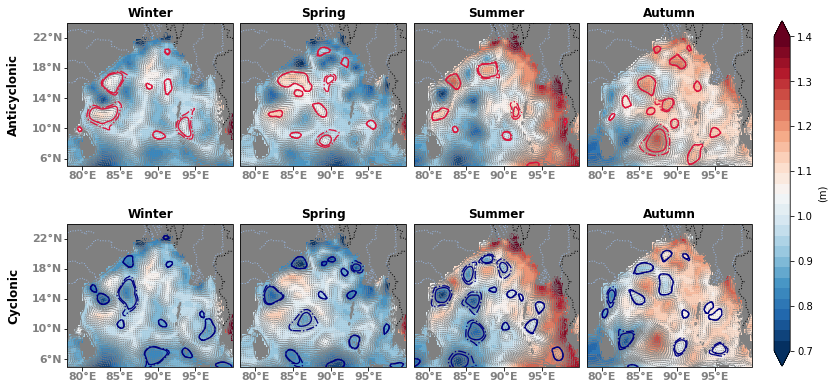

In [102]:
fig = plt.figure(figsize=(15, 8))


############################### First Plot -- DJF ##################################

ax = fig.add_subplot(241, projection=ccrs.PlateCarree())
ax.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax.add_feature(cfeature.LAND, color = 'gray')
ax.add_feature(cfeature.COASTLINE, color = 'gray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax.set_xticks([80, 85, 90, 95])
ax.set_yticks([6, 10, 14, 18, 22])

ax.set_yticklabels([])
ax.set_xticklabels([])

gl = ax.gridlines()
gl.bottom_labels = True
gl.left_labels = True
gl.xlines = False
gl.ylines = False

gl.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_djf.nc', "longitude", "latitude",)

m = g.display(ax, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

ax.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################### Second plot -- MAM #####################################

ax1 = fig.add_subplot(242, projection=ccrs.PlateCarree())
ax1.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax1.add_feature(cfeature.LAND, color = 'gray')
ax1.add_feature(cfeature.COASTLINE, color = 'gray')
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax1.set_xticks([80, 85, 90, 95])
#ax1.set_yticks([6, 10, 14, 18, 22])

#ax1.set_yticklabels([])
ax1.set_xticklabels([])

gl1 = ax1.gridlines()
gl1.bottom_labels = True
gl1.left_labels = False
gl1.xlines = False
gl1.ylines = False

gl1.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl1.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl1.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl1.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_mam.nc', "longitude", "latitude",)

m2 = g2.display(ax1, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 4, 15)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax1, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax1, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax1.quiver(g2.x_c, g2.y_c, u, v, scale=15, color="grey")

#ax1.legend(loc='upper right', fontsize = 8)

ax1.annotate('(b)MAM', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m2, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################# Third Plot -- JJA ############################

ax3 = fig.add_subplot(243, projection=ccrs.PlateCarree())
ax3.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax3.add_feature(cfeature.LAND, color = 'gray')
ax3.add_feature(cfeature.COASTLINE, color = 'gray')
ax3.add_feature(cfeature.BORDERS, linestyle=':')
ax3.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax3.set_xticks([80, 85, 90, 95])
#ax3.set_yticks([6, 10, 14, 18, 22])

#ax3.set_yticklabels([])
ax3.set_xticklabels([])

gl3 = ax3.gridlines()
gl3.bottom_labels = True
gl3.left_labels = False
gl3.xlines = False
gl3.ylines = False

gl3.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl3.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl3.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl3.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_jja.nc', "longitude", "latitude",)

m3 = g3.display(ax3, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 7, 15)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax3, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax3.quiver(g3.x_c, g3.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

ax3.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

######################## Fourth Plot -- SON #######################

ax4 = fig.add_subplot(244, projection=ccrs.PlateCarree())
ax4.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax4.add_feature(cfeature.LAND, color = 'gray')
ax4.add_feature(cfeature.COASTLINE, color = 'gray')
ax4.add_feature(cfeature.BORDERS, linestyle=':')
ax4.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax4.set_xticks([80, 85, 90, 95])
#ax4.set_yticks([6, 10, 14, 18, 22])

#ax4.set_yticklabels([])
ax4.set_xticklabels([])

gl4 = ax4.gridlines()
gl4.bottom_labels = True
gl4.left_labels = False
gl4.xlines = False
gl4.ylines = False

gl4.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl4.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl4.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl4.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_son.nc', "longitude", "latitude",)

m4 = g4.display(ax4, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
#c.display(ax4, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax4.quiver(g4.x_c, g4.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

ax4.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=0.7, top=None, wspace=None, hspace=None)


#plt.colorbar(m4, cax=ax4.figure.add_axes([0.66, 0.15, 0.016, 0.70]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

#plt.savefig('drive/MyDrive/2020/seasonal_a.png', dpi=300, bbox_inches = "tight")

################################## Cyclonic ######################

############################### First Plot -- DJF ##################################

ax5 = fig.add_subplot(245, projection=ccrs.PlateCarree())
ax5.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax5.add_feature(cfeature.LAND, color = 'gray')
ax5.add_feature(cfeature.COASTLINE, color = 'gray')
ax5.add_feature(cfeature.BORDERS, linestyle=':')
ax5.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='black')
ax5.set_ylabel('Cyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax5.set_xticks([80, 85, 90, 95])
ax5.set_yticks([6, 10, 14, 18, 22])

ax5.set_yticklabels([])
ax5.set_xticklabels([])

gl5 = ax5.gridlines()
gl5.bottom_labels = True
gl5.left_labels = True
gl5.xlines = False
gl5.ylines = False

gl5.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl5.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl5.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl5.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g = RegularGridDataset('drive/MyDrive/2020/SLA/sla_djf.nc', "longitude", "latitude",)

m5 = g.display(ax5, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax5, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g.add_uv("adt")
u, v = g.grid("u").T, g.grid("v").T
ax5.quiver(g.x_c, g.y_c, u, v, scale=15, color="grey")

#ax.legend(loc='upper right', fontsize = 8)

ax5.annotate('(a)DJF', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Winter', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################### Second plot -- MAM #####################################

ax6 = fig.add_subplot(246, projection=ccrs.PlateCarree())
ax6.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax6.add_feature(cfeature.LAND, color = 'gray')
ax6.add_feature(cfeature.COASTLINE, color = 'gray')
ax6.add_feature(cfeature.BORDERS, linestyle=':')
ax6.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax6.set_xticks([80, 85, 90, 95])
#ax6.set_yticks([6, 10, 14, 18, 22])

#ax6.set_yticklabels([])
ax6.set_xticklabels([])

gl6 = ax6.gridlines()
gl6.bottom_labels = True
gl6.left_labels = False
gl6.xlines = False
gl6.ylines = False

gl6.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl6.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl6.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl6.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g2 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_mam.nc', "longitude", "latitude",)

m6 = g2.display(ax6, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 4, 15)
a, c = g2.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax1, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax6, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g2.add_uv("adt")
u, v = g2.grid("u").T, g2.grid("v").T
ax6.quiver(g2.x_c, g2.y_c, u, v, scale=15, color="grey")

#ax1.legend(loc='upper right', fontsize = 8)

ax6.annotate('(b)MAM', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Spring', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m2, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')


############################# Third Plot -- JJA ############################

ax7 = fig.add_subplot(247, projection=ccrs.PlateCarree())
ax7.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax7.add_feature(cfeature.LAND, color = 'gray')
ax7.add_feature(cfeature.COASTLINE, color = 'gray')
ax7.add_feature(cfeature.BORDERS, linestyle=':')
ax7.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')
#ax3.set_ylabel('Anticyclonic', labelpad=40, fontsize=12, weight='bold', color='black')


ax7.set_xticks([80, 85, 90, 95])
#ax7.set_yticks([6, 10, 14, 18, 22])

#ax7.set_yticklabels([])
ax7.set_xticklabels([])

gl7 = ax7.gridlines()
gl7.bottom_labels = True
gl7.left_labels = False
gl7.xlines = False
gl7.ylines = False

gl7.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl7.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl7.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl7.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g3 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_jja.nc', "longitude", "latitude",)

m7 = g3.display(ax7, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 7, 15)
a, c = g3.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax3, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax7, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g3.add_uv("adt")
u, v = g3.grid("u").T, g3.grid("v").T
ax7.quiver(g3.x_c, g3.y_c, u, v, scale=15, color="grey")

#ax3.legend(loc='upper right', fontsize = 8)

ax7.annotate('(c)JJA', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Summer', fontsize=12, fontname = 'Times New Roman', weight='bold')


#plt.colorbar(m3, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

######################## Fourth Plot -- SON #######################

ax8 = fig.add_subplot(248, projection=ccrs.PlateCarree())
ax8.set_extent([78, 100, 5, 24], ccrs.PlateCarree()) 


ax8.add_feature(cfeature.LAND, color = 'gray')
ax8.add_feature(cfeature.COASTLINE, color = 'gray')
ax8.add_feature(cfeature.BORDERS, linestyle=':')
ax8.add_feature(cfeature.RIVERS, linestyle=':')

#ax.set_xlabel('Longitude', labelpad=20, fontsize=12, weight='bold', color='dimgray')
#ax.set_ylabel('Latitude', labelpad=40, fontsize=12, weight='bold', color='dimgray')


ax8.set_xticks([80, 85, 90, 95])
#ax8.set_yticks([6, 10, 14, 18, 22])

#ax8.set_yticklabels([])
ax8.set_xticklabels([])

gl8 = ax8.gridlines()
gl8.bottom_labels = True
gl8.left_labels = False
gl8.xlines = False
gl8.ylines = False

gl8.xlocator = mticker.FixedLocator(np.arange(75,105,5))
gl8.ylocator = mticker.FixedLocator(np.arange(6,25,4))

gl8.xlabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}
gl8.ylabel_style = {'size': 11, 'color': 'gray', 'weight': 'bold'}

g4 = RegularGridDataset('drive/MyDrive/2020/SLA/sla_son.nc', "longitude", "latitude",)

m8 = g4.display(ax8, "adt", vmin=0.7, vmax=1.4, cmap = plt.cm.get_cmap("RdBu_r", 30))

date = datetime(2020, 3, 15)
a, c = g4.eddy_identification("adt", "ugos", "vgos", date, 0.005, shape_error=55)


#a.display(ax4, color="crimson", linewidth= 1.3, label="Anticyclonic ({nb_obs} eddies)", ref=-10)
c.display(ax8, color="navy", linewidth= 1.3, label="Cyclonic ({nb_obs} eddies)", ref=-10)

g4.add_uv("adt")
u, v = g4.grid("u").T, g4.grid("v").T
ax8.quiver(g4.x_c, g4.y_c, u, v, scale=15, color="grey")

#ax4.legend(loc='upper right', fontsize = 8)

ax8.annotate('(d)SON', xy=(79, 24), fontsize = 8, fontname = 'Times New Roman', weight='bold')

plt.title('Autumn', fontsize=12, fontname = 'Times New Roman', weight='bold')

#plt.colorbar(m4, extend='both', ticks=np.linspace(0.7, 1.3, num=7), label='(m)')

fig.tight_layout()

plt.subplots_adjust(left=None, bottom=0.15, right=0.7, top=None, wspace=None, hspace=None)


plt.colorbar(m4, cax=ax4.figure.add_axes([0.72, 0.268, 0.015, 0.6]), extend='both', ticks=np.linspace(0.7, 1.4, num=8), label="(m)")

plt.savefig('drive/MyDrive/2020/seasonal_eddy.pdf', dpi=300, bbox_inches = "tight")


